In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
import pickle

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from pymo.parsers import BVHParser
from pymo.preprocessing import *
from pymo.viz_tools import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
p = BVHParser()

data_all = [p.parse('../../MocapFiles/8walk/14_NVLA_8_walk_meredith1.bvh')]

In [5]:
print_skel(data_all[0])

- Hips (None)
| | - RightUpLeg (Hips)
| | - RightLeg (RightUpLeg)
| | - RightFoot (RightLeg)
| | - RightToeBase (RightFoot)
| | - RightToeBase_Nub (RightToeBase)
| - LeftUpLeg (Hips)
| - LeftLeg (LeftUpLeg)
| - LeftFoot (LeftLeg)
| - LeftToeBase (LeftFoot)
| - LeftToeBase_Nub (LeftToeBase)
- Spine (Hips)
| | - RightShoulder (Spine)
| | - RightArm (RightShoulder)
| | - RightForeArm (RightArm)
| | - RightHand (RightForeArm)
| | | - RightHand_End (RightHand)
| | | - RightHand_End_Nub (RightHand_End)
| | - RightHandThumb1 (RightHand)
| | - RightHandThumb1_Nub (RightHandThumb1)
| - LeftShoulder (Spine)
| - LeftArm (LeftShoulder)
| - LeftForeArm (LeftArm)
| - LeftHand (LeftForeArm)
| | - LeftHand_End (LeftHand)
| | - LeftHand_End_Nub (LeftHand_End)
| - LeftHandThumb1 (LeftHand)
| - LeftHandThumb1_Nub (LeftHandThumb1)
- Head (Spine)
- Head_Nub (Head)


In [6]:
data_all[0].values.head(10)

,Hips_Xposition,Hips_Yposition,Hips_Zposition,Hips_Zrotation,Hips_Xrotation,Hips_Yrotation,Spine_Xposition,Spine_Yposition,Spine_Zposition,Spine_Zrotation,...,RightFoot_Zposition,RightFoot_Zrotation,RightFoot_Xrotation,RightFoot_Yrotation,RightToeBase_Xposition,RightToeBase_Yposition,RightToeBase_Zposition,RightToeBase_Zrotation,RightToeBase_Xrotation,RightToeBase_Yrotation
00:00:00,4.0077,35.8637,-163.021,-2.54528,-5.63579,1.130000,0.000000e+00,8.47295,-2.842170e-14,2.57579,...,0.000000e+00,5.14682,-11.0073,2.52464,0.000000e+00,-1.45131,5.41636,1.739370e-16,-7.6046,-0.000000e+00
00:00:00.008333,4.0077,35.8637,-163.021,-2.53765,-5.61730,1.081320,1.776360e-15,8.47295,0.000000e+00,2.56873,...,0.000000e+00,5.25684,-11.0659,2.51732,0.000000e+00,-1.45131,5.41636,1.192710e-15,-7.4217,-0.000000e+00
00:00:00.016667,4.0077,35.8637,-163.022,-2.52069,-5.62018,1.088040,-8.881780e-16,8.47295,0.000000e+00,2.55801,...,0.000000e+00,5.37492,-11.0330,2.61626,-8.881780e-16,-1.45131,5.41636,4.845380e-16,-7.8085,-0.000000e+00
00:00:00.025000,4.0077,35.8637,-163.030,-2.53315,-5.59288,1.071630,0.000000e+00,8.47295,-2.842170e-14,2.55057,...,2.842170e-14,4.98206,-11.0489,2.52312,-8.881780e-16,-1.45131,5.41636,-4.348410e-16,-8.0089,-0.000000e+00
00:00:00.033333,4.0077,35.8637,-163.035,-2.54993,-5.58238,1.080180,8.881780e-16,8.47295,0.000000e+00,2.61629,...,2.842170e-14,5.00947,-10.9611,2.91036,0.000000e+00,-1.45131,5.41636,2.857530e-16,-8.0715,-0.000000e+00
00:00:00.041667,4.0077,35.8637,-163.038,-2.50761,-5.58599,1.055390,-8.881780e-16,8.47295,0.000000e+00,2.59596,...,0.000000e+00,5.08529,-10.9763,2.95625,8.881780e-16,-1.45131,5.41636,-1.274080e-16,-8.0222,-2.007490e-16
00:00:00.050000,4.0077,35.8637,-163.040,-2.53125,-5.59529,1.069140,0.000000e+00,8.47295,2.842170e-14,2.63568,...,2.842170e-14,5.08376,-10.9580,2.91581,0.000000e+00,-1.45131,5.41636,1.500660e-15,-7.8758,-2.006780e-16
00:00:00.058333,4.0077,35.8637,-163.054,-2.55290,-5.53325,0.995436,0.000000e+00,8.47295,-2.842170e-14,2.58611,...,-2.842170e-14,5.12251,-11.0060,2.73813,-8.881780e-16,-1.45131,5.41636,1.384380e-15,-7.8771,4.013560e-16
00:00:00.066667,4.0077,35.8637,-163.052,-2.55300,-5.57709,1.024380,0.000000e+00,8.47295,2.842170e-14,2.59617,...,0.000000e+00,4.94636,-11.0346,2.75941,0.000000e+00,-1.45131,5.41636,-8.351480e-16,-7.9006,-2.006900e-16
00:00:00.075000,4.0077,35.8637,-163.062,-2.55498,-5.57593,0.994227,0.000000e+00,8.47295,2.842170e-14,2.62162,...,0.000000e+00,5.01934,-10.9791,2.77321,8.881780e-16,-1.45131,5.41636,1.478460e-15,-8.1095,-0.000000e+00


In [7]:
dr_pipe = Pipeline([
    ('param', MocapParameterizer('positions')),
])

In [8]:
data_all[0].values.shape

(14016, 138)

In [9]:
xx = dr_pipe.fit_transform(data_all)

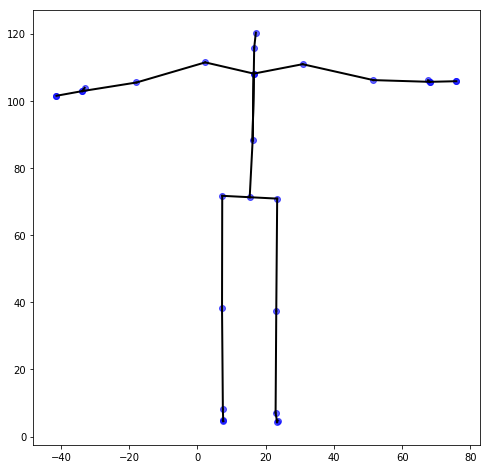

In [10]:
draw_stickfigure(xx[0], 600, xx[0].values)

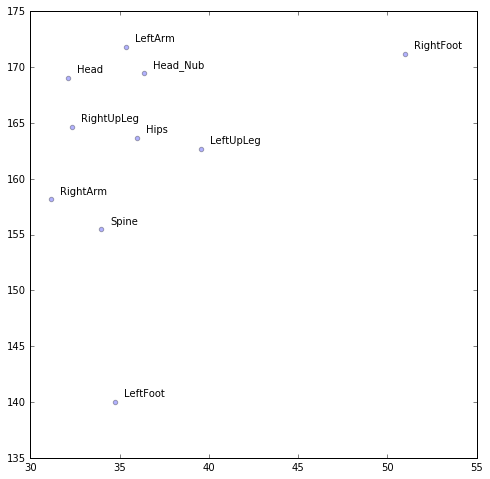

In [137]:
frame = 100
fig = plt.figure(figsize=(8,8))
#ax = fig.add_subplot(111, projection='3d')
ax = fig.add_subplot(111)
for joint in ['LeftArm', 'RightArm', 'Head', 'LeftFoot','RightFoot','Hips','Spine', 'Head_Nub','RightUpLeg', 'LeftUpLeg']:
    ax.scatter(x=df['%s_Yposition'%joint][frame], 
               y=-df['%s_Zposition'%joint][frame], 
              # zs=df['%s_Yposition'%joint][frame], 
               alpha=0.3, c='b', marker='o')
    ax.annotate(joint, 
                (df['%s_Yposition'%joint][frame] + 0.5, 
                 -df['%s_Zposition'%joint][frame] + 0.5))

In [138]:
xx[0].values.head(10)

,Hips_Xrotation,Hips_Yrotation,Hips_Zrotation,Hips_Xposition,Hips_Yposition,Hips_Zposition,RightUpLeg_Xposition,RightUpLeg_Yposition,RightUpLeg_Zposition,RightLeg_Xposition,...,LeftHandThumb1_Zposition,LeftHandThumb1_Nub_Xposition,LeftHandThumb1_Nub_Yposition,LeftHandThumb1_Nub_Zposition,Head_Xposition,Head_Yposition,Head_Zposition,Head_Nub_Xposition,Head_Nub_Yposition,Head_Nub_Zposition
00:00:00,-1.21540,-0.089682,-1.70535,-4.86500,35.8973,-163.641,-6.262209,32.215285,-164.503814,-1.493120,...,-140.011459,-10.926065,28.635433,-140.864179,-16.767487,41.014540,-152.672237,-20.032155,43.712274,-151.071338
00:00:00.008333,-1.28187,-0.008698,-1.73660,-4.86500,35.8973,-163.624,-6.013656,32.091728,-164.296378,0.019846,...,-138.942806,-11.951703,31.343250,-140.700077,-17.361425,40.381087,-155.047833,-21.077855,42.830846,-154.219864
00:00:00.016667,-1.33953,0.021255,-1.75655,-4.86500,35.8973,-163.609,-5.788878,32.025578,-164.249388,0.957633,...,-140.002912,-8.536289,27.122127,-140.790586,-17.716811,39.269695,-153.774574,-21.362228,41.645269,-152.523059
00:00:00.025000,-1.40596,0.059121,-1.75287,-4.86140,35.8973,-163.595,-5.521795,31.949776,-164.079572,1.515141,...,-139.283662,-8.796912,27.812826,-140.189540,-18.108281,38.494872,-154.766972,-21.970391,39.192031,-152.509366
00:00:00.033333,-1.40111,0.099148,-1.74616,-4.85240,35.8973,-163.593,-5.529887,31.934128,-163.889920,-0.085108,...,-140.156472,-7.555245,28.456740,-141.269390,-17.867374,39.048013,-153.270858,-21.291259,40.109950,-150.505354
00:00:00.041667,-1.38944,0.106303,-1.74321,-4.84670,35.8973,-163.590,-5.569752,31.939268,-163.845059,-0.196383,...,-138.656158,-9.058847,32.194545,-140.690000,-17.808822,39.650007,-154.757518,-21.241159,40.379816,-151.896547
00:00:00.050000,-1.37251,0.111049,-1.75027,-4.84080,35.8972,-163.588,-5.630093,31.952274,-163.849631,-0.906576,...,-138.141955,-7.384622,32.780671,-140.478475,-17.654570,40.003069,-155.299351,-21.350784,40.951521,-152.862725
00:00:00.058333,-1.39048,0.100376,-1.76178,-4.83824,35.8972,-163.589,-5.557633,31.945981,-163.941450,0.456097,...,-141.137644,-12.269548,16.214404,-143.065541,-17.770538,39.553027,-154.673868,-21.246624,40.220722,-151.850799
00:00:00.066667,-1.33924,0.083914,-1.76478,-4.83602,35.8971,-163.588,-5.757989,31.995100,-164.010195,1.496616,...,-139.247191,-14.143606,16.815739,-141.591378,-17.132528,40.530411,-152.999877,-19.789893,41.505015,-149.466144
00:00:00.075000,-1.37002,0.098562,-1.76359,-4.83432,35.8971,-163.576,-5.634442,31.962477,-163.939899,1.063746,...,-138.935693,-14.364425,16.692725,-141.228076,-17.268164,40.299266,-152.875372,-19.566065,41.077920,-149.052800


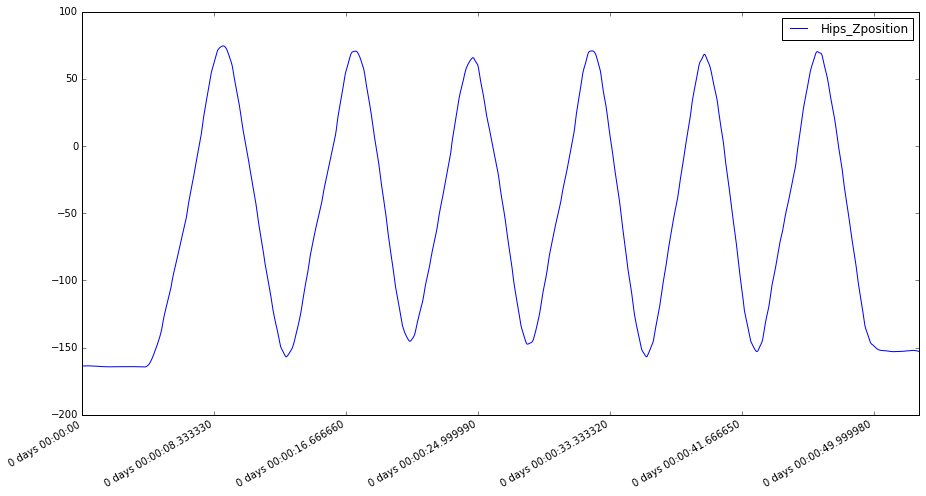

In [139]:
xx[0].values.plot(x=xx[0].values.index, y='Hips_Zposition',figsize=(15,8))

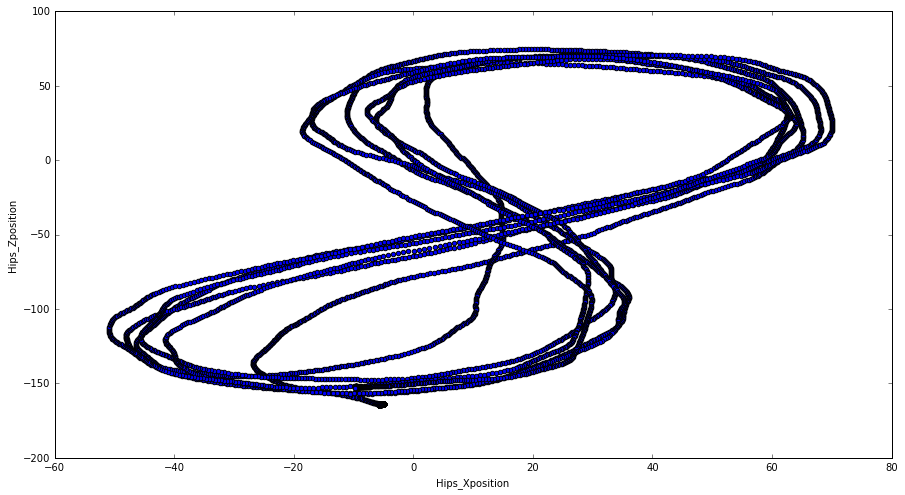

In [140]:
xx[0].values.plot.scatter(x='Hips_Xposition', y='Hips_Zposition', figsize=(15,8))

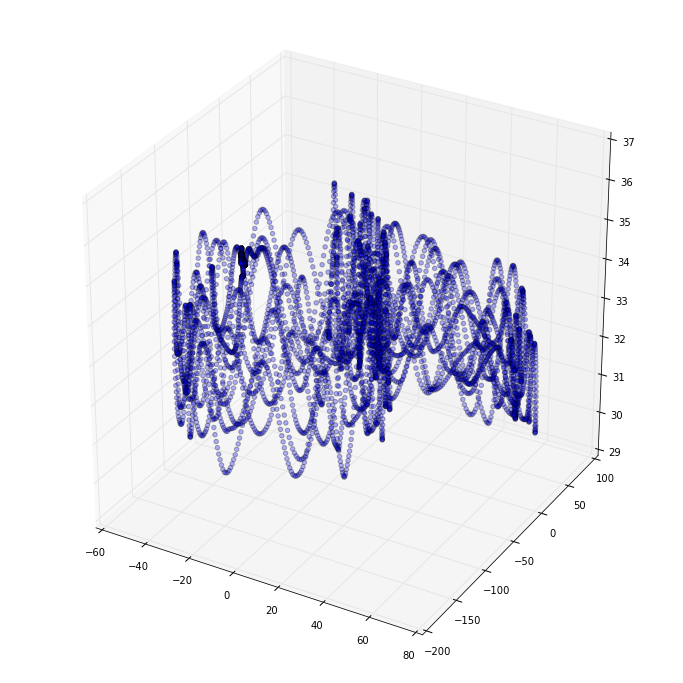

In [141]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=df.Hips_Xposition, ys=df.Hips_Zposition,  zs=df.Hips_Yposition, alpha=0.3, c='b', marker='o')

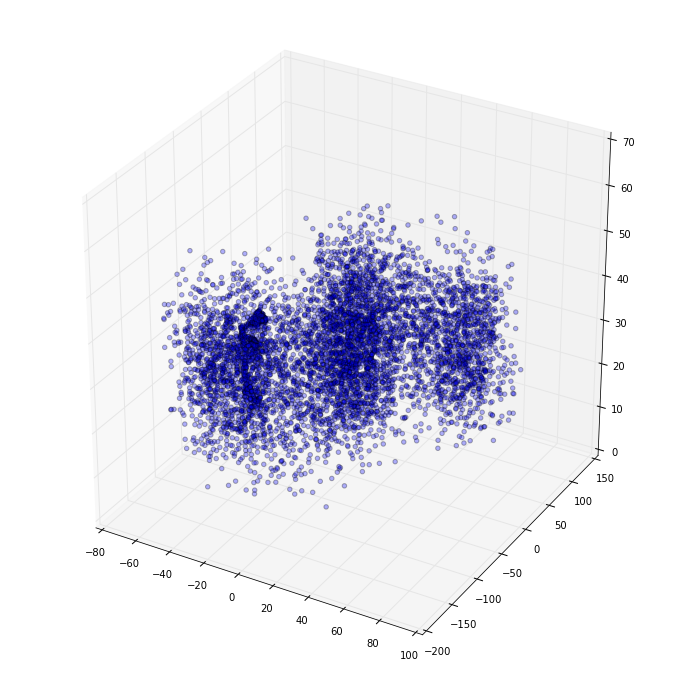

In [142]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=df.LeftArm_Xposition, ys=df.LeftArm_Zposition,  zs=df.LeftArm_Yposition, alpha=0.3, c='b', marker='o')